![Linux Academy](la-logo.png)
<hr/>

<center><h1>TensorFlow/Keras Basic Classification </h1></center>

![Sorting Lego bricks](./lego.jpg)

<center><h2>Lego Brick Sorting</h2></center>

# Introduction

In this Linux Academy hands-on lab, we take an introductory look at __TensorFlow__ with __Keras__ and use it to make a simple artificial neural network.

## TensorFlow

TensorFlow (backed by Google) is an end-to-end, open source platform for machine learning. It has a comprehensive, flexible ecosystem of tools, libraries, and community resources. This lets researchers push the state-of-the-art in ML and developers easily build and deploy ML-powered applications.

_(Source: https://www.tensorflow.org/)_

## Keras

Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. It was developed with a focus on enabling fast experimentation. Being able to go from idea to result with the least possible delay is key to doing good research.

_(Source: https://keras.io/)_

__Or, to put it another way:__

TensorFlow is a complex tool. Keras has been built ontop of TensorFlow as a more user-friendly interface. It helps us rapidly prototype models, and we use it in this lab.


# Scenario

We have bricks, lots of brick. Lego bricks that is. And we need to sort them.

We have a collection of photos of different Lego bricks from different angles. We have 600 photos (really we do) and they are all labeled with the brick name.

Each photo has been processed. This involved increasing the contrast, sharpening, removing the color, inverting the colors, and reducing the size.

|![Sample Lego brick photo](./sample-before.png)|![Sample Lego brick photo](./sample-after.png)|
|----------------------------------------|----------------------------------------|
| Sample before processing                | Sample after processing                |

In addition to this, we loaded all the images into a single data array for easier loading into the algorithm.  If you're interested in how these images were collected and processed, contact me through the Linux Academy Community Slack: ```@mike chambers```.

We need to create a simple, deep learning, neural network classifier model. We will train the model using the photo data and see if it correctly predicts or infers the type of a brick from a supplied test image.

# How to Use This Lab

This is a follow-along lab. That is to say the code in this Jupyter Notebook should be complete, and you could simply execute the notebook to get a result. However, watch along with the video to learn more about what is happening in the code and then take the time to experiment with the code; make changes, break it, fix it, and learn!

# 1) The Libraries

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras

tf.logging.set_verbosity(tf.logging.ERROR) #only error msg from tensorflow

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


1.15.2


# 2) Load the Data [numpy]

We have a dataset created from a set of photos of Lego bricks. We have a total of 4 data arrays saved to files as NumPy arrays.

1. `lego-simple-train-images.npy` - Training images, around 80% of the data collected.
2. `lego-simple-train-labels.npy` - A list of integer labels identifying the classes of the training images.
3. `lego-simple-test-images.npy`  - Testing images, around 20% of the data collected.
4. `lego-simple-test-labels.npy`  - A list of integer labels identifying the classes of the testing images.

First, we load the data into runtime arrays.

In [2]:
# pre-trained data 
train_images = np.load('lego-simple-train-images.npy')
train_labels = np.load('lego-simple-train-labels.npy')
test_images = np.load('lego-simple-test-images.npy')
test_labels = np.load('lego-simple-test-labels.npy')

In [3]:
train_images.shape

(451, 48, 48)

In [4]:
train_images[0] # 0.01568627 - 0 black

array([[0.01568627, 0.01568627, 0.01568627, ..., 0.01568627, 0.01568627,
        0.01568627],
       [0.01568627, 0.01568627, 0.01568627, ..., 0.01568627, 0.01568627,
        0.01568627],
       [0.01568627, 0.01568627, 0.01568627, ..., 0.01568627, 0.01568627,
        0.01568627],
       ...,
       [0.03921569, 0.03921569, 0.03921569, ..., 0.01960784, 0.01960784,
        0.01960784],
       [0.03921569, 0.03921569, 0.03921569, ..., 0.01960784, 0.01960784,
        0.01960784],
       [0.03529412, 0.03529412, 0.03529412, ..., 0.01960784, 0.01960784,
        0.01960784]])

The label data we loaded are integer values (1,2,3). Let's get some human names for the data classes we're working with.

In [5]:
# For humans:
class_names = ['2x3 Brick', '2x2 Brick', '1x3 Brick', '2x1 Brick', '1x1 Brick', '2x2 Macaroni', '2x2 Curved End', 'Cog 16 Tooth', '1x2 Handles', '1x2 Grill']

# Or the real Lego codes:
# class_names = ['3002', '3003', '3622', '3004', '3005', '3063', '47457', '94925', '3839a', '2412b']

In [6]:
len(class_names)

10

The data is loaded but it's nice to see it. Let's take a look at one of the images loaded with the data.

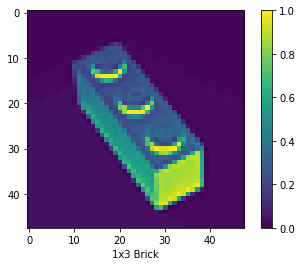

In [7]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.xlabel(class_names[train_labels[0]])
plt.show()

Let's look at some more data and make the formatting a little nicer.

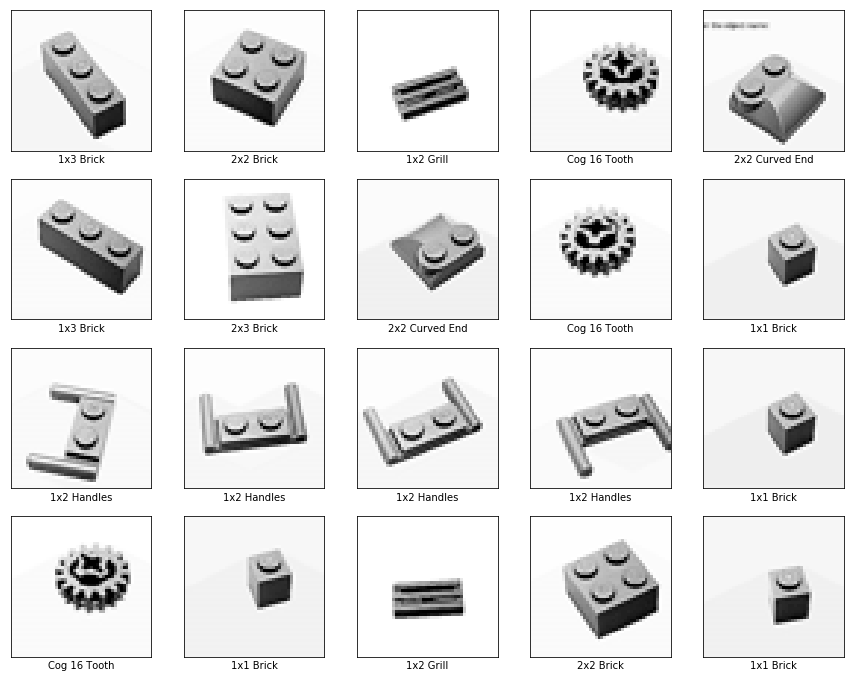

In [8]:
plt.figure(figsize=(15,15))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# 3) Training [TensorFlow Keras]

Now the data is loaded, so let's start training. First, we need to create a model. We're creating an artificial neural network. It has three layers.

1. The input layer with enough nodes for our image data.
2. A hidden layer with 128 nodes.
3. An output layer with 10 nodes, one for each of the classes we want to identify.

Each layer is densely connected, meaning each neuron in one layer is connected to every neuron in the next layer.

In [9]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(48, 48)),  # input 
    keras.layers.Dense(128, activation=tf.nn.relu), # hidden layer
    keras.layers.Dense(10, activation=tf.nn.softmax) # output : 10 classes
])

Now we compile the model.

In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Finally, it's time to train the model. Note the epochs and watch the accuracy as it processes.

In [11]:
history = model.fit(train_images, train_labels, epochs=4)  # epoch - num of time that it going to process all data

Train on 451 samples
Epoch 1/4
451/451 [==============================] - 0s 802us/sample - loss: 1.8590 - acc: 0.4080
Epoch 2/4
451/451 [==============================] - 0s 147us/sample - loss: 0.8623 - acc: 0.8137
Epoch 3/4
451/451 [==============================] - 0s 155us/sample - loss: 0.4696 - acc: 0.9091
Epoch 4/4
451/451 [==============================] - 0s 147us/sample - loss: 0.2721 - acc: 0.9601


You can see from the output above that with each epoch, the model gets a greater accuracy (acc) score. When we trained the model, we stored the ```history``` of the training in a variable so we can draw a graph of how the training process progressed. We can plot accuracy and loss over the epochs.

In [12]:
history.history

{'loss': [1.8589591007274957,
  0.8622505169221408,
  0.46962796346575614,
  0.2720553884881563],
 'acc': [0.40798226, 0.8137472, 0.90909094, 0.9600887]}

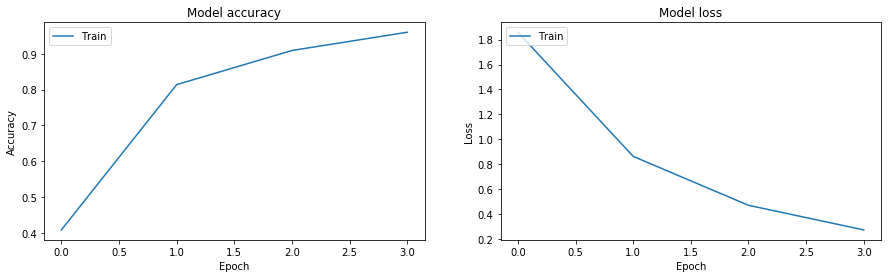

In [13]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 2, 1)
# Plot training accuracy values
plt.plot(history.history['acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(1, 2, 2)
# Plot training loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 4) Testing and Analysis

Accuracy while training is one thing. Let's calculate accuracy against the __testing data__. If the accuracy achieved during training is much greater than what we calculate for the testing data, the model is probably overfit. This means it works well to classify training data but not testing data.

In [14]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

150/150 [==============================] - 0s 631us/sample - loss: 0.3168 - acc: 0.9600
Test accuracy: 0.96


# 5) Try Some Predictions

Let's use our model to make some predictions using our testing data. Remember the model hasn't 'seen' our testing data, not during training anyway. So when we make predictions using testing images, it's doing real work.

Here are a couple of functions to help with the display of the prediction data.

In [15]:
# Function to display the image:

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'
  # Print a label with 'predicted class', 'probability %', 'actual class'
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

# Function to display the prediction results in a graph:
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.xticks(range(10))
  plt.yticks([])
  plot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  plot[predicted_label].set_color('red')
  plot[true_label].set_color('green')

## Single Prediction

Let's grab one of the images from the test dataset.

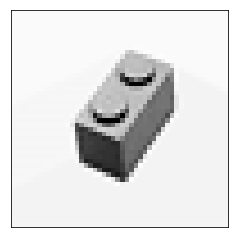

In [16]:
test_image_number = 8

img = test_images[test_image_number]
plt.figure()
plt.xticks([])
plt.yticks([])
plt.imshow(img, cmap=plt.cm.binary)
plt.show()

We need to do a quick transformation of the image data as the ```predict``` method expects a list of images. So we make a list of one.

In [17]:
img = (np.expand_dims(img,0))
img.shape

(1, 48, 48)

Then we pass our image to the ```predict``` method. The result is a list of probabilities that the image is a certain class.

In [18]:
predictions_single = model.predict(img)
predictions_single

array([[0.00155485, 0.00910404, 0.00672707, 0.45761785, 0.02914255,
        0.4141917 , 0.04169389, 0.01896498, 0.01032513, 0.01067802]],
      dtype=float32)

NumPy has a handy function to find the largest value in the list, which saves us having to look! We use the value it finds to lookup the label that's been predicted for this image.

In [19]:
prediction_result = np.argmax(predictions_single[0])
class_names[prediction_result]

'2x1 Brick'

Did we get it right? Let's lookup the class name for the test image (i.e. the real class name, not the predicted one). We hope they are the same! Did the model get it right?

In [20]:
class_names[test_labels[test_image_number]]

'2x1 Brick'

Now let's plot a bar chart using the helper function we defined at the start of this section. This gives us a sense of how well the model classified this image.

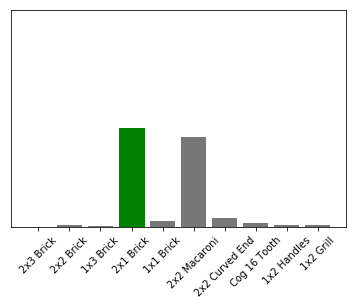

In [21]:
plot_value_array(0, predictions_single, [test_labels[test_image_number]])
plt.xticks(range(10), class_names, rotation=45)
plt.show()

## Batch Prediction

Now let's get prediction values for **all** the test images we have.

In [22]:
predictions = model.predict(test_images)

Finally, let's use our helper functions to summarize the first 16 images in our test data. How did we do?

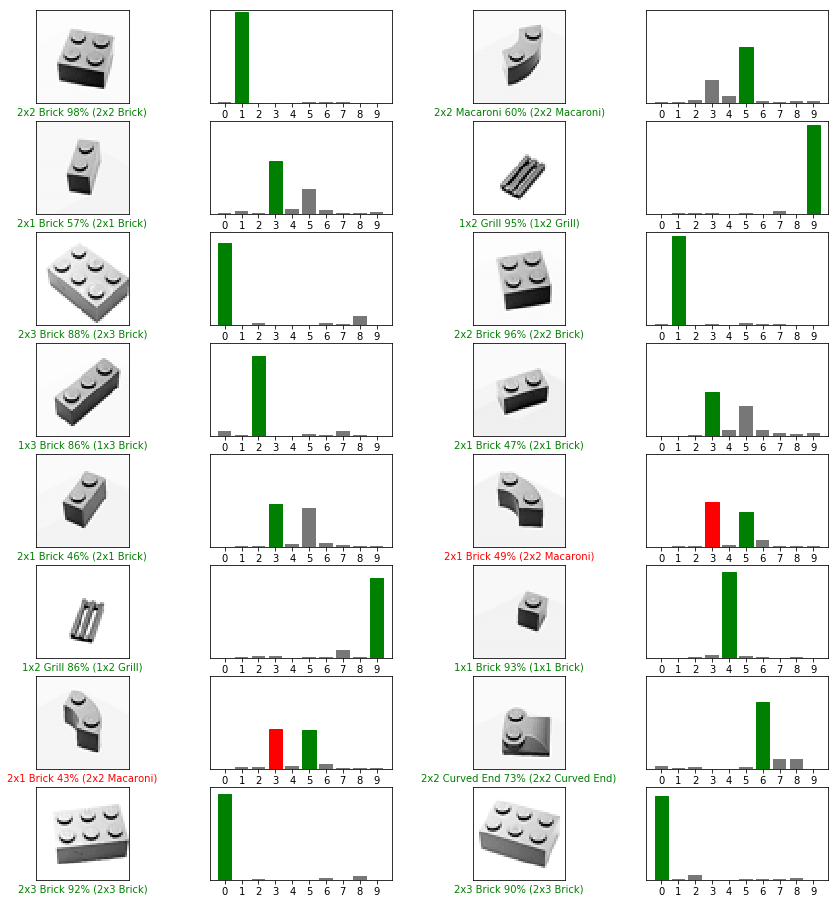

In [23]:
num_rows = 8
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(15, 16))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

That's the end of this Linux Academy hands-on lab. Thanks!